In [3]:
!pip install kaggle pandas seaborn matplotlib scipy openpyxl folium wordcloud nltk gensim torch transformers

  Using cached kaggle-1.6.8.tar.gz (84 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached folium-0.16.0-py2.py3-none-any.whl (100 kB)
  Using cached wordcloud-1.9.3-cp39-cp39-win_amd64.whl (300 kB)
     -------------------------------------- 198.5/198.5 MB 2.1 MB/s eta 0:00:00
  Using cached transformers-4.39.1-py3-none-any.whl (8.8 MB)
  Using cached certifi-2024.2.2-py3-none-any.whl (163 kB)
  Using cached branca-0.7.1-py3-none-any.whl (25 kB)
  Using cached xyzservices-2023.10.1-py3-none-any.whl (56 kB)
  Using cached typing_extensions-4.10.0-py3-none-any.whl (33 kB)
  Using cached huggingface_hub-0.22.0-py3-none-any.whl (388 kB)
  Using cached safetensors-0.4.2-cp39-none-win_amd64.whl (269 kB)
  Using cached tokenizers-0.15.2-cp39-none-win_amd64.whl (2.2 MB)
  Using cached Jinja2-3.1.3-py3-none-any.whl (133 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl (171 kB)
  Created wheel for kaggle: filename=kaggle-1.

ERROR: Could not install packages due to an OSError: [WinError 32] Процесс не может получить доступ к файлу, так как этот файл занят другим процессом: 'C:\\Users\\Nasty\\anaconda3\\Lib\\site-packages\\torch\\lib\\dnnl.lib'
Consider using the `--user` option or check the permissions.



In [4]:
import os


def get_secret(secret_name: str) -> str:
    if not os.environ.get(secret_name):
        print(f"Введите секрет {secret_name}: ")
        secret = input().strip()
        os.environ[secret_name] = secret
    return os.environ[secret_name]

In [5]:
_ = get_secret("KAGGLE_USERNAME")
_ = get_secret("KAGGLE_KEY")

Введите секрет KAGGLE_USERNAME: 
  Using cached kaggle-1.6.8.tar.gz (84 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached folium-0.16.0-py2.py3-none-any.whl (100 kB)
  Using cached wordcloud-1.9.3-cp39-cp39-win_amd64.whl (300 kB)
     -------------------------------------- 198.5/198.5 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 8.8/8.8 MB 623.9 kB/s eta 0:00:00
     ------------------------------------ 163.8/163.8 kB 756.3 kB/s eta 0:00:00
     -------------------------------------- 56.3/56.3 kB 582.9 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 970.2 kB/s eta 0:00:00
     ------------------------------------ 388.5/388.5 kB 835.0 kB/s eta 0:00:00
     ------------------------------------ 269.7/269.7 kB 638.9 kB/s eta 0:00:00
     -------------------------------------- 133.2/133.2 kB 1.3 MB/s eta 0:00:00
     ------------------------------------ 172.0/172.0 kB 54

ERROR: Could not install packages due to an OSError: [WinError 32] Процесс не может получить доступ к файлу, так как этот файл занят другим процессом: 'C:\\Users\\Nasty\\anaconda3\\Lib\\site-packages\\tokenizers\\implementations\\__init__.py'
Consider using the `--user` option or check the permissions.



Введите секрет KAGGLE_KEY: 


In [6]:
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
import folium
from wordcloud import WordCloud
from transformers import BartTokenizer, BartForConditionalGeneration

Matplotlib is building the font cache; this may take a moment.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


     -------------------------------------- 84.6/84.6 kB 953.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 100.0/100.0 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 300.6/300.6 kB 2.1 MB/s eta 0:00:00
     ------------------------------------ 198.5/198.5 MB 881.9 kB/s eta 0:00:00
  Using cached transformers-4.39.1-py3-none-any.whl (8.8 MB)
  Using cached certifi-2024.2.2-py3-none-any.whl (163 kB)
  Using cached branca-0.7.1-py3-none-any.whl (25 kB)
  Using cached xyzservices-2023.10.1-py3-none-any.whl (56 kB)
  Using cached typing_extensions-4.10.0-py3-none-any.whl (33 kB)
  Using cached tokenizers-0.15.2-cp39-none-win_amd64.whl (2.2 MB)
  Using cached huggingface_hub-0.22.0-py3-none-any.whl (388 kB)
  Using cached safetensors-0.4.2-cp39-none-win_amd64.whl (269 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl (133 kB)
  Using cached fsspec-2024.3.

In [7]:
api = KaggleApi()
api.authenticate()
api.dataset_download_files("ankkur13/boston-crime-data", path="./", unzip=True)

In [8]:
df = pd.read_csv("crime.csv", encoding="latin1")
df.head()

C:\Users\Nasty\AppData\Local\Temp\ipykernel_15704\2456720447.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("crime.csv", encoding="latin1")


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      327820 non-null  object 
 1   OFFENSE_CODE         327820 non-null  int64  
 2   OFFENSE_CODE_GROUP   327820 non-null  object 
 3   OFFENSE_DESCRIPTION  327820 non-null  object 
 4   DISTRICT             326046 non-null  object 
 5   REPORTING_AREA       327820 non-null  object 
 6   SHOOTING             1055 non-null    object 
 7   OCCURRED_ON_DATE     327820 non-null  object 
 8   YEAR                 327820 non-null  int64  
 9   MONTH                327820 non-null  int64  
 10  DAY_OF_WEEK          327820 non-null  object 
 11  HOUR                 327820 non-null  int64  
 12  UCR_PART             327727 non-null  object 
 13  STREET               316843 non-null  object 
 14  Lat                  307188 non-null  float64
 15  Long             

In [10]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,327820.000000,327820.000000,327820.000000,327820.000000,307188.000000,307188.000000
mean,2317.961171,2016.598676,6.672213,13.114840,42.212995,-70.906030
std,1184.990073,1.009775,3.253984,6.292714,2.173496,3.515832
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297466,-71.097081
50%,2907.000000,2017.000000,7.000000,14.000000,42.325552,-71.077493
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062482
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [11]:
district_crime = df["DISTRICT"].value_counts()
district_crime # преступления по районам

B2     51288
C11    43817
D4     43338
A1     36735
B3     36400
C6     24190
D14    20632
E13    17981
E18    17825
A7     13634
E5     13543
A15     6663
Name: DISTRICT, dtype: int64

In [12]:
crime_type = df["OFFENSE_CODE_GROUP"].value_counts()
crime_type # типы преступлений

Motor Vehicle Accident Response              38134
Larceny                                      26670
Medical Assistance                           24226
Investigate Person                           19176
Other                                        18612
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

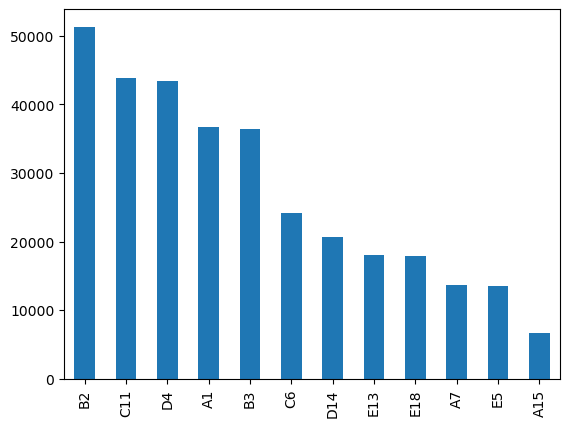

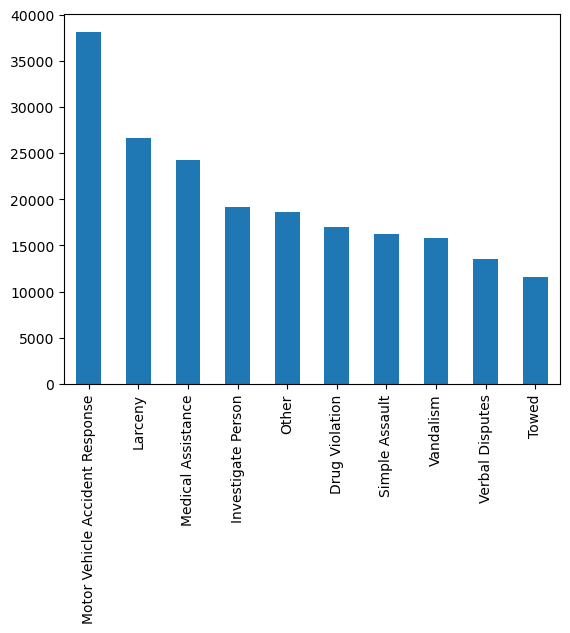

In [13]:
# Визуализация распределения преступлений по районам
district_crime.plot(kind="bar")
plt.show()

# Визуализация распределения преступлений по типам (топ 10)
crime_type[:10].plot(kind="bar")
plt.show()

In [14]:
df["OCCURRED_ON_DATE"] = pd.to_datetime(df["OCCURRED_ON_DATE"])
df["YEAR"] = df["OCCURRED_ON_DATE"].dt.year
df["MONTH"] = df["OCCURRED_ON_DATE"].dt.month
df["DAY_OF_WEEK_NUM"] = df["OCCURRED_ON_DATE"].dt.dayofweek
df["HOUR"] = df["OCCURRED_ON_DATE"].dt.hour
df.head()
# добавляем дополнительные данные для возможного временного анализа

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DAY_OF_WEEK_NUM
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)",2
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)",3
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)",2
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)",2
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)",2


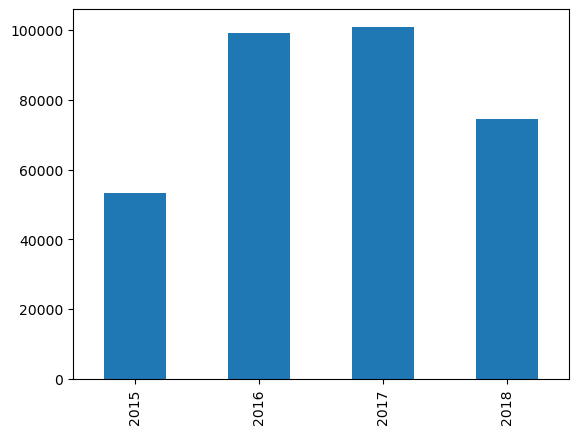

In [15]:
crime_year = df["YEAR"].value_counts().sort_index()
crime_year.plot(kind="bar")
plt.show() # преступления в разрезе года

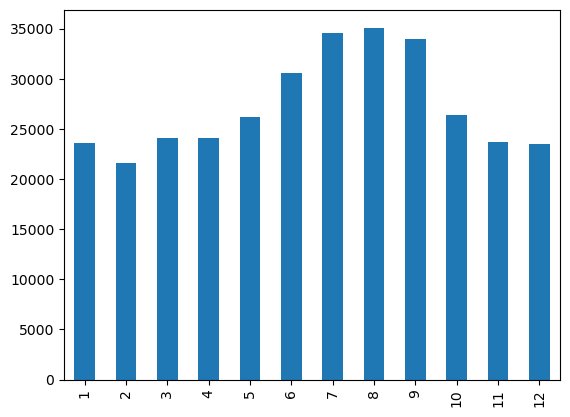

In [16]:
crime_month = df["MONTH"].value_counts().sort_index()
crime_month.plot(kind="bar")
plt.show() # преступления в разрезе месяца

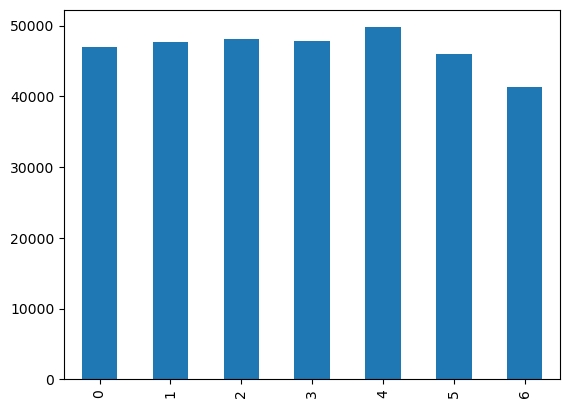

In [17]:
crime_day_of_week = df["DAY_OF_WEEK_NUM"].value_counts().sort_index()
crime_day_of_week.plot(kind="bar")
plt.show()

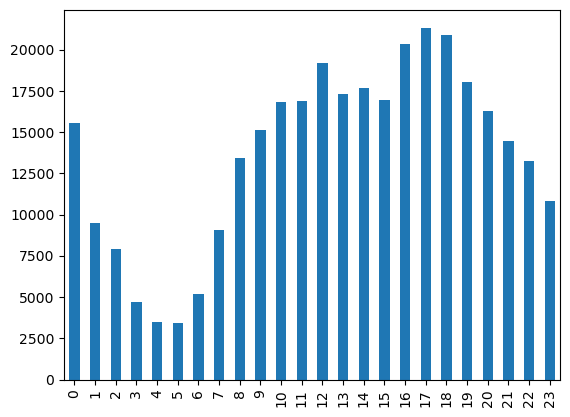

In [18]:
crime_hour = df["HOUR"].value_counts().sort_index()
crime_hour.plot(kind="bar")
plt.show()

In [19]:
# функция для посчета корреляции по крамеру для категориальных перменных
def correlation_of_crosstab(crosstab) -> float:
    chi2, p, dof, expected = chi2_contingency(crosstab)
    return np.sqrt(chi2 / (df.shape[0] * (min(crosstab.shape) - 1)))

In [20]:
crosstab1 = pd.crosstab(df['OFFENSE_CODE_GROUP'], df['DISTRICT'])
print("Kramer's correlation between OFFENSE_CODE_GROUP and DISTRICT:", correlation_of_crosstab(crosstab1))

# Перекрестная таблица между OFFENSE_CODE_GROUP и DAY_OF_WEEK
crosstab2 = pd.crosstab(df['OFFENSE_CODE_GROUP'], df['DAY_OF_WEEK'])
print("Kramer's correlation between OFFENSE_CODE_GROUP and DAY_OF_WEEK:", correlation_of_crosstab(crosstab2))

# Перекрестная таблица между DISTRICT и DAY_OF_WEEK
crosstab3 = pd.crosstab(df['DISTRICT'], df['DAY_OF_WEEK'])
print("Kramer's correlation between DISTRICT and DAY_OF_WEEK:", correlation_of_crosstab(crosstab3))

# как видим есть маленькая корелляция между между типом преступления и райном в котором оно происходило

Kramer's correlation between OFFENSE_CODE_GROUP and DISTRICT: 0.10477894832390713
Kramer's correlation between OFFENSE_CODE_GROUP and DAY_OF_WEEK: 0.047556720970755764
Kramer's correlation between DISTRICT and DAY_OF_WEEK: 0.01492899178084408


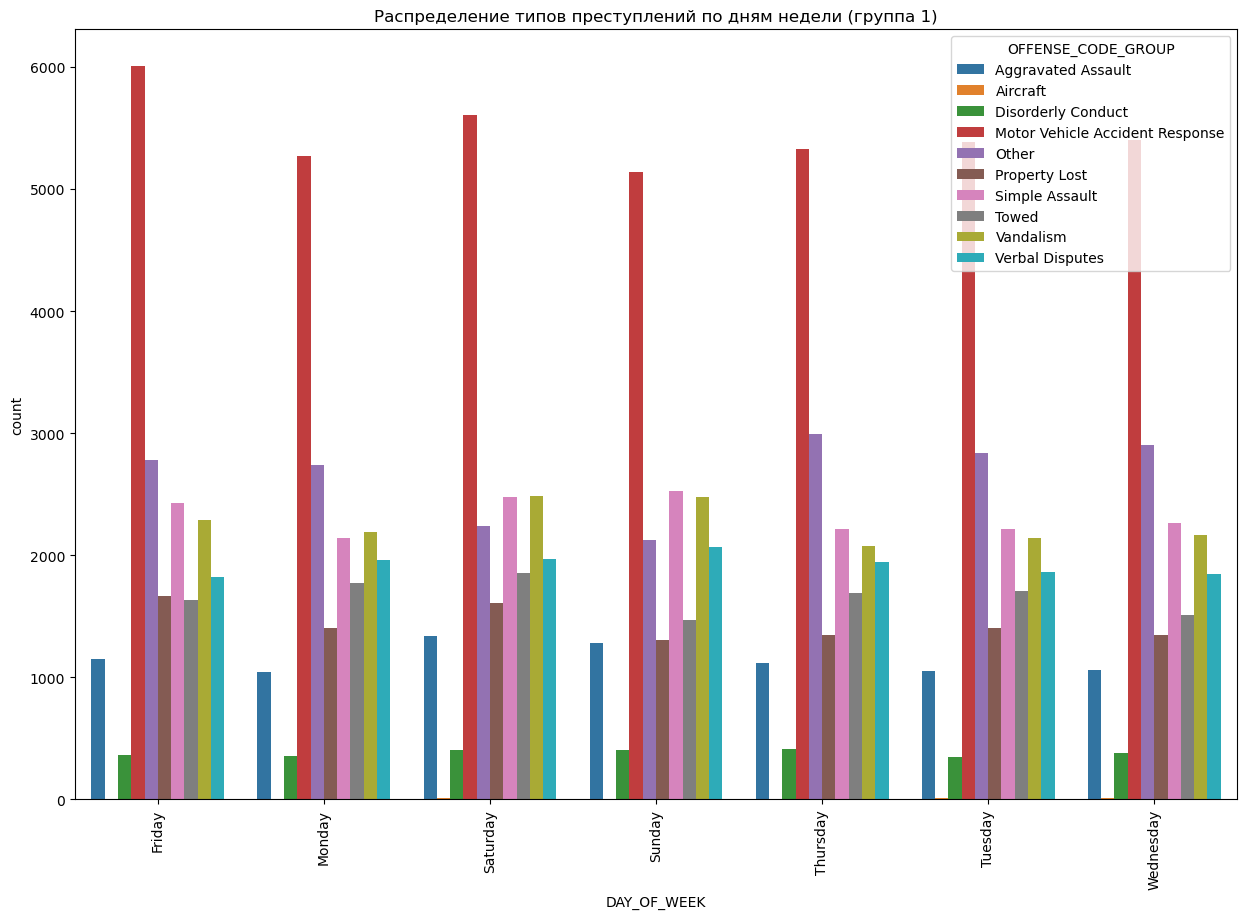

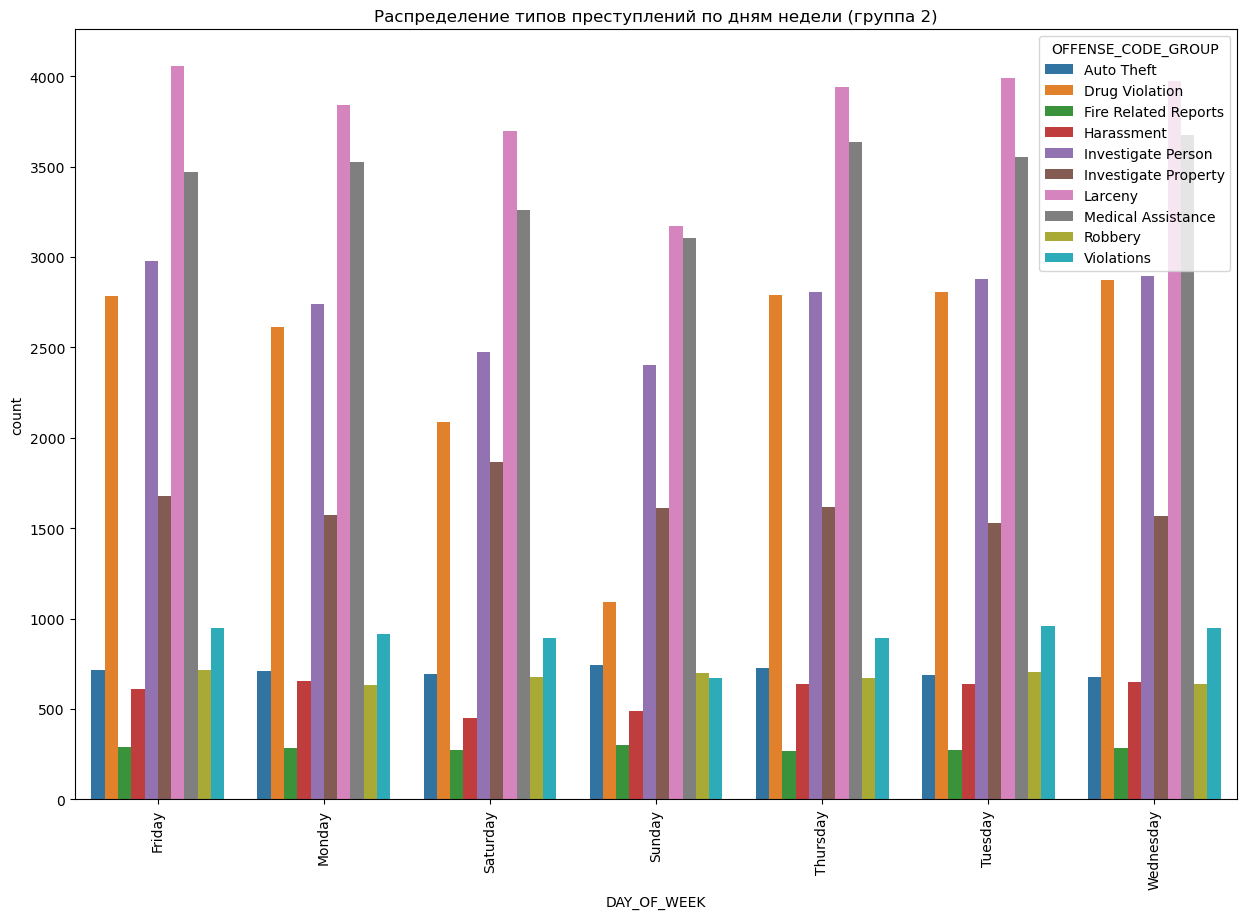

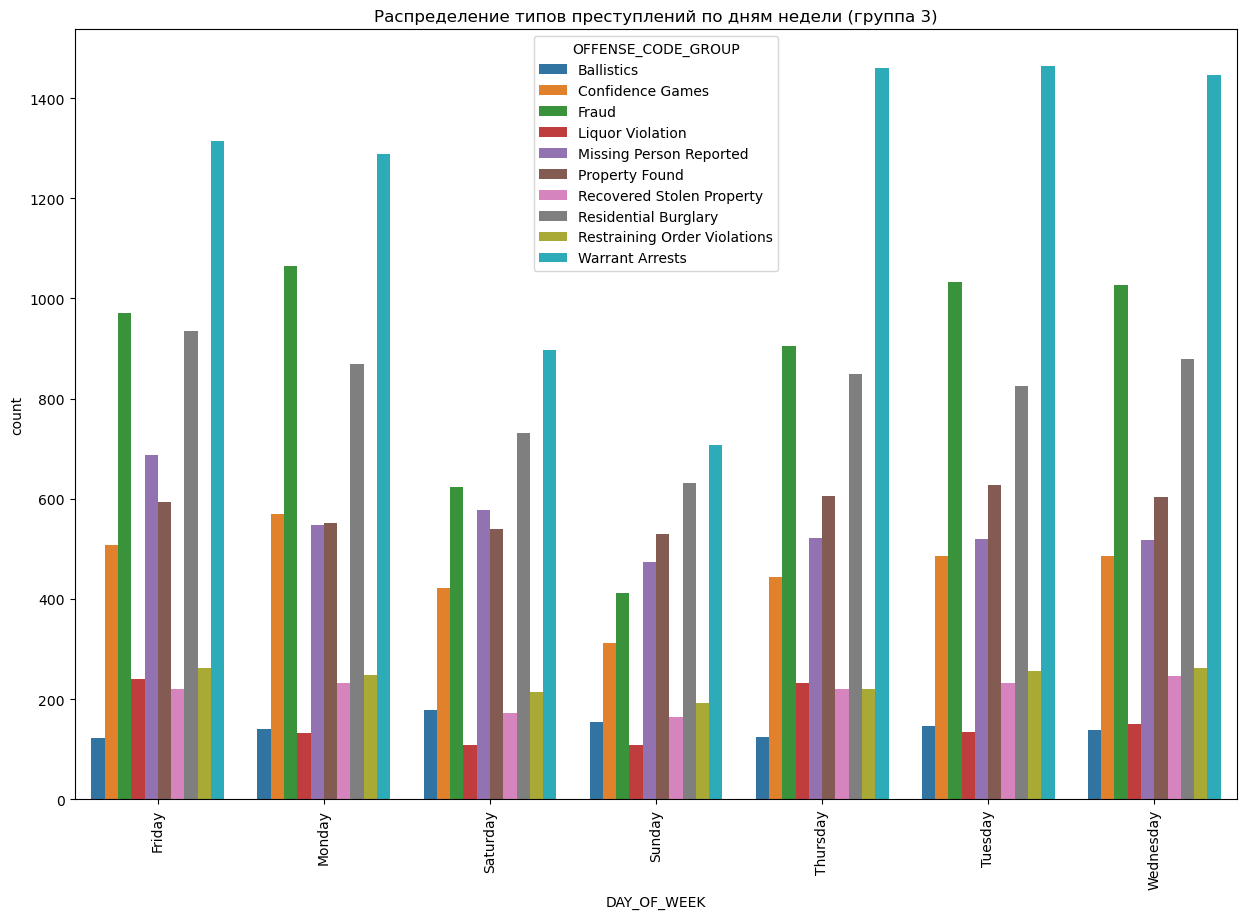

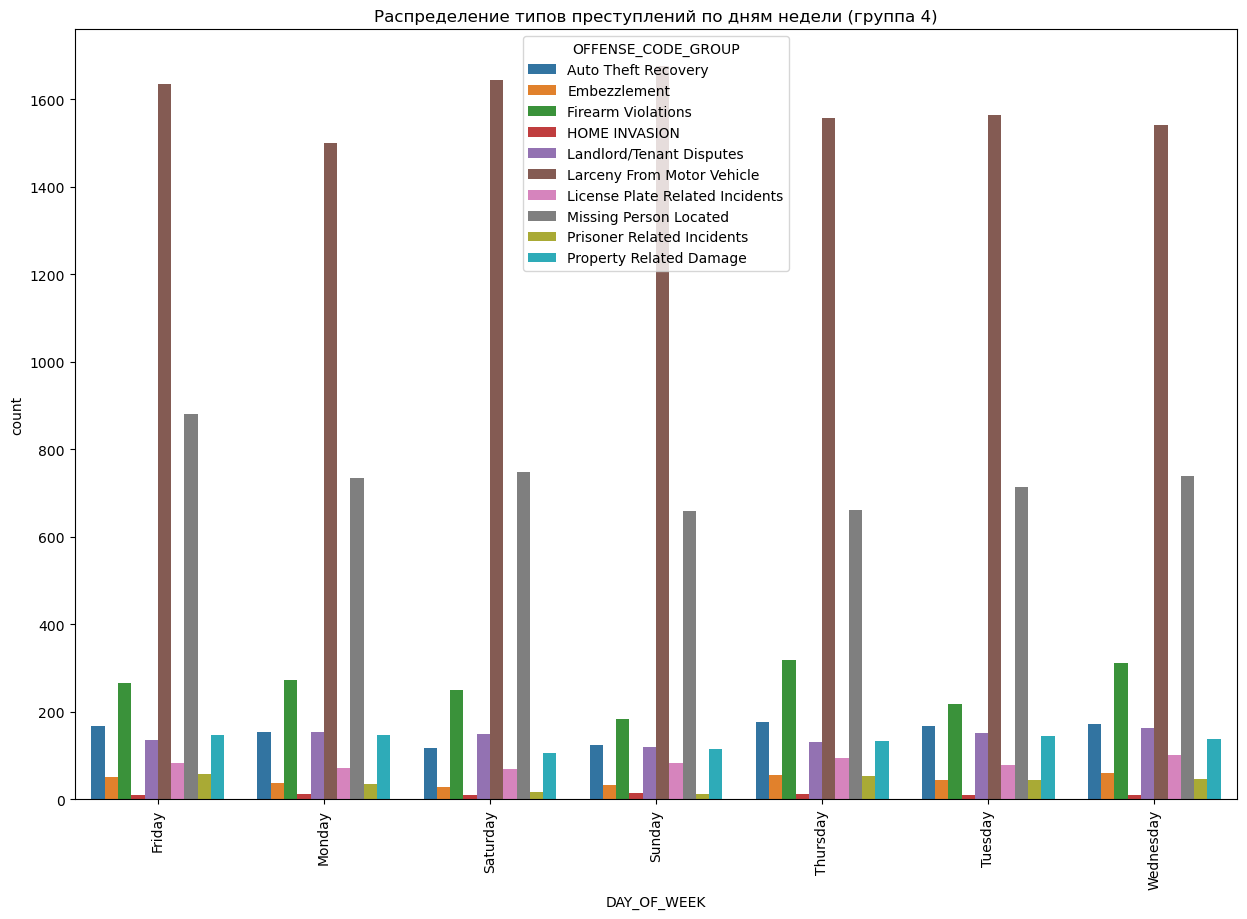

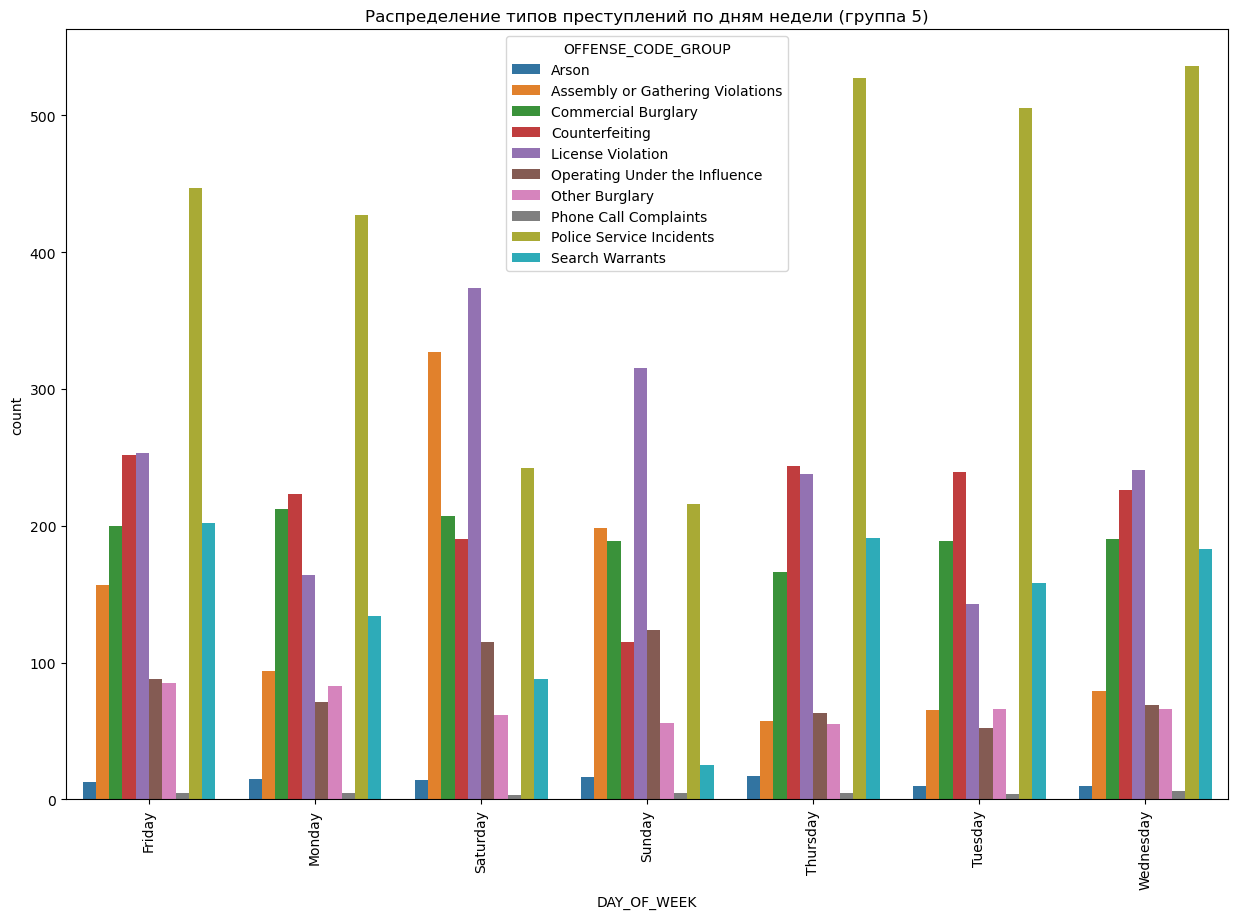

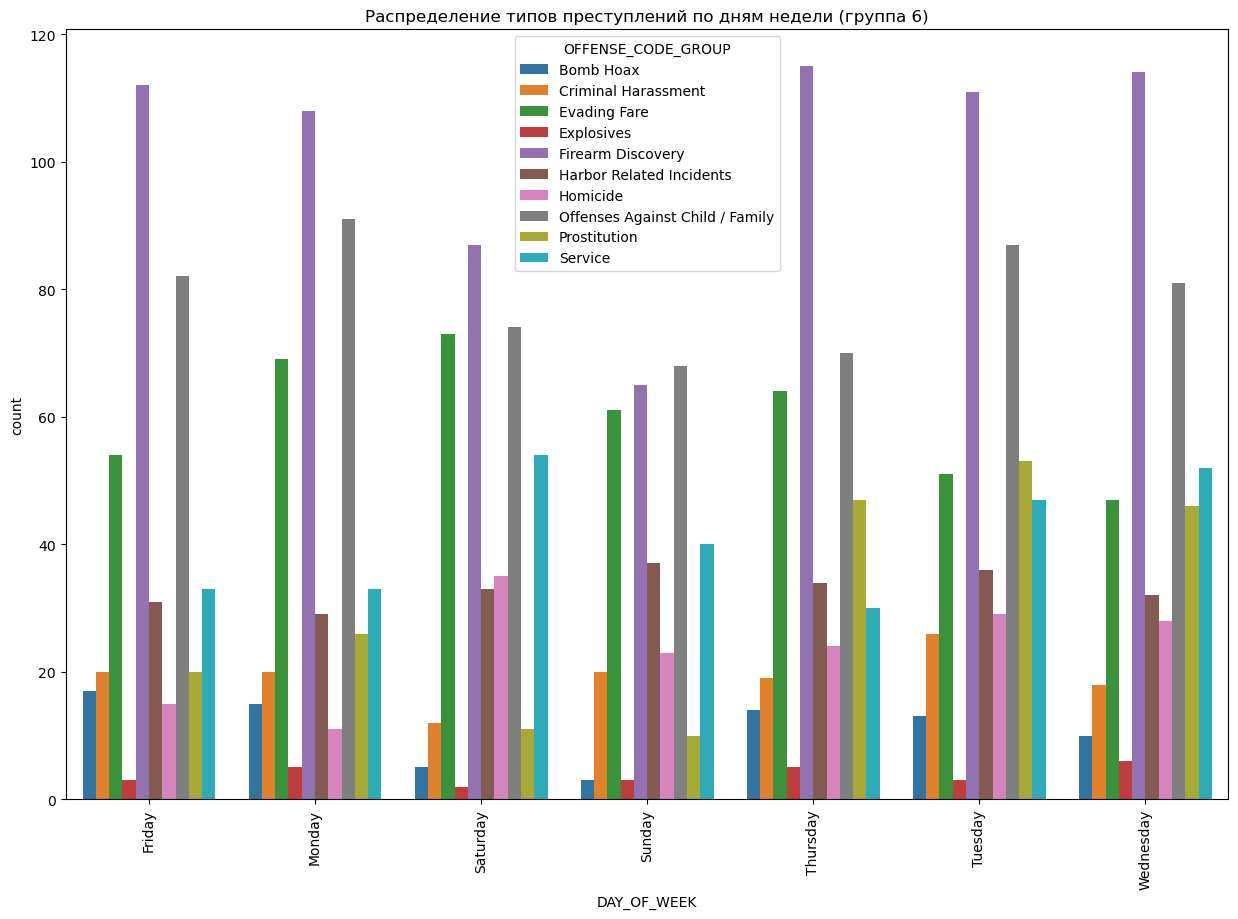

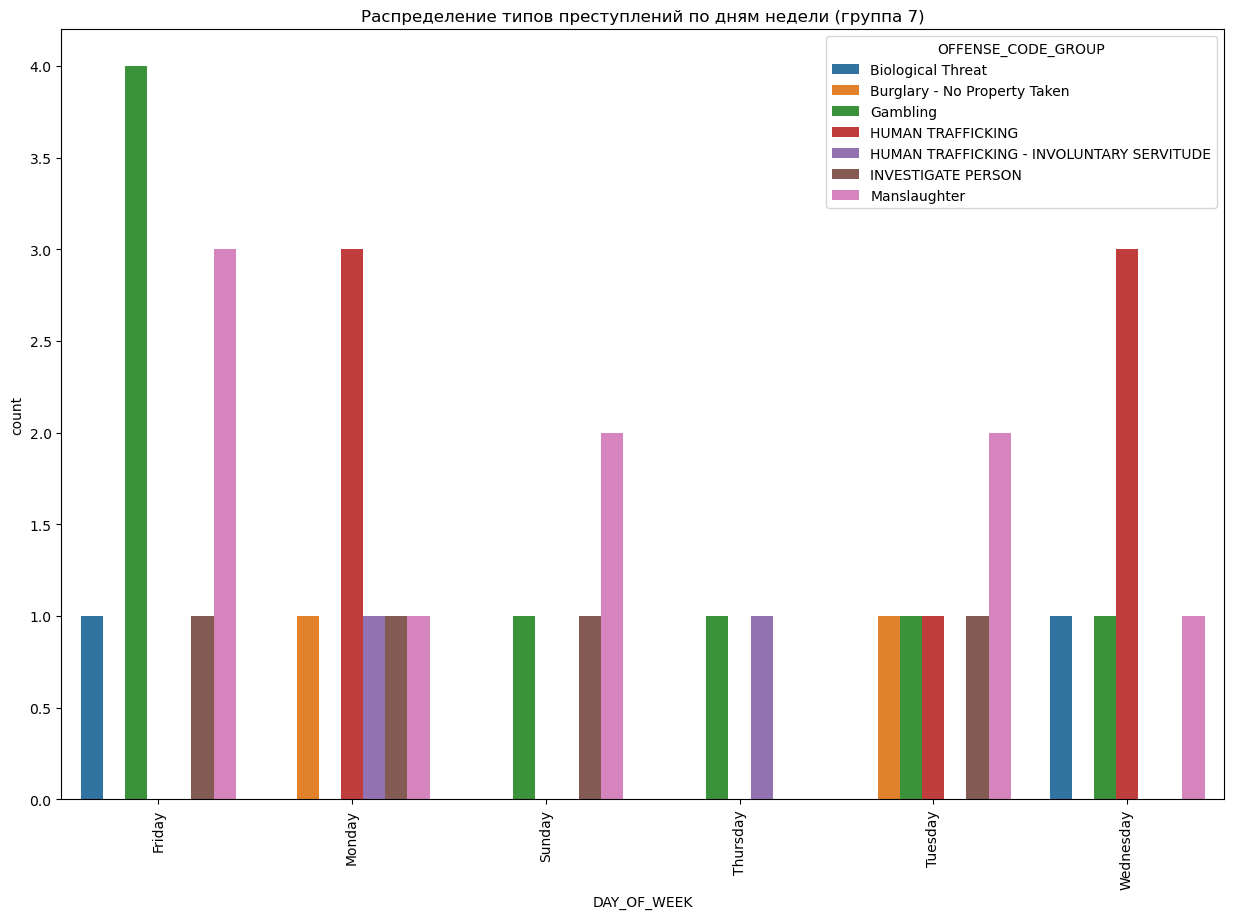

In [21]:
# анализ преступлений по дням недели
offense_groups = df["OFFENSE_CODE_GROUP"].unique()

# Разделяем этот список на подгруппы по 10 элементов
offense_subgroups = [offense_groups[n : n + 10] for n in range(0, len(offense_groups), 10)]

# Для каждой подгруппы строим отдельный график
for i, subgroup in enumerate(offense_subgroups):
    # Сначала отфильтровываем данные DF чтобы оставить только преступления в текущей подгруппе
    subgroup_df = df[df["OFFENSE_CODE_GROUP"].isin(subgroup)]

    # Создаем crosstab и преобразуем его в "длинный" формат
    offense_day = pd.crosstab(subgroup_df["OFFENSE_CODE_GROUP"], subgroup_df["DAY_OF_WEEK"])
    offense_day = offense_day.reset_index().melt(id_vars="OFFENSE_CODE_GROUP", value_name="count")

    # Построим график для текущей подгруппы
    plt.figure(figsize=(15, 10))
    sns.barplot(x="DAY_OF_WEEK", y="count", hue="OFFENSE_CODE_GROUP", data=offense_day)
    plt.xticks(rotation=90)
    plt.title(f"Распределение типов преступлений по дням недели (группа {i+1})")
    plt.show()

In [22]:
# описательные статистики
grouped = df.groupby(["OFFENSE_CODE_GROUP", "DAY_OF_WEEK"])

num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Если в столбце только одно уникальное значение, describe() будет NaN, так что исключим такие столбцы
cat_cols = [col for col in cat_cols if df[col].nunique() > 1]

# Делаем describe для числовых столбцов и сохраняем в Excel
descr_num = grouped[num_cols].describe()
descr_num.to_excel('grouped_describe_numerical.xlsx')

# Делаем describe для категориальных столбцов и сохраняем в Excel
descr_cat = grouped[cat_cols].describe(include='all')
descr_cat.to_excel('grouped_describe_categorical.xlsx')

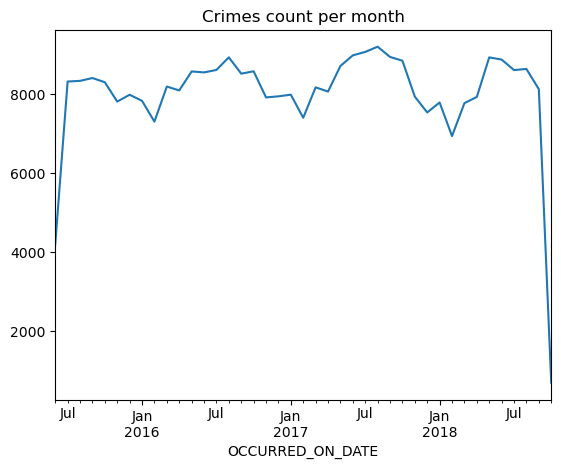

In [23]:
# всё тот же временной анализ, видим циклы
tf = df.copy()
tf.set_index('OCCURRED_ON_DATE', inplace=True)
tf.resample('M').size().plot()
plt.title('Crimes count per month')
plt.show()


In [24]:
# гео анализ, группируем точки перступлений, с помощью кластеризации DBSCAN

df_sample = df.dropna(subset=['Lat', 'Long']).sample(500)

from sklearn.cluster import DBSCAN

# достаем кокординаты
coords = coords = df_sample[['Lat', 'Long']].values

# пространственная кластеризация
kms_per_radian = 6371.0088
epsilon = 1 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

df_sample['Cluster'] = db.labels_

# количество кластеров (игнорируем шумные кластеры)
num_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

print('Number of clusters: {}'.format(num_clusters))
cluster_centers = df_sample.groupby('Cluster')[['Lat', 'Long']].mean().values

Number of clusters: 2


In [25]:
from sklearn.preprocessing import MinMaxScaler

# считаем размер кластера
cluster_sizes = df_sample.groupby('Cluster').size().values.reshape(-1, 1)

# нормализуем размеры кластеров
scaler = MinMaxScaler(feature_range=(5, 15)) # range of marker sizes to scale to
normalized_sizes = scaler.fit_transform(cluster_sizes)

# создаем карту
lat, lon = df_sample.Lat.mean(), df_sample.Long.mean()
crime_map = folium.Map(location=[lat, lon], zoom_start=13)

# добавляем макеры на каждый кластер
for i in range(len(cluster_centers)):
    # ignore noise clusters
    if i != -1:
        folium.CircleMarker((cluster_centers[i][0], cluster_centers[i][1]), radius=normalized_sizes[i][0], color='red', fill=True).add_to(crime_map)

crime_map


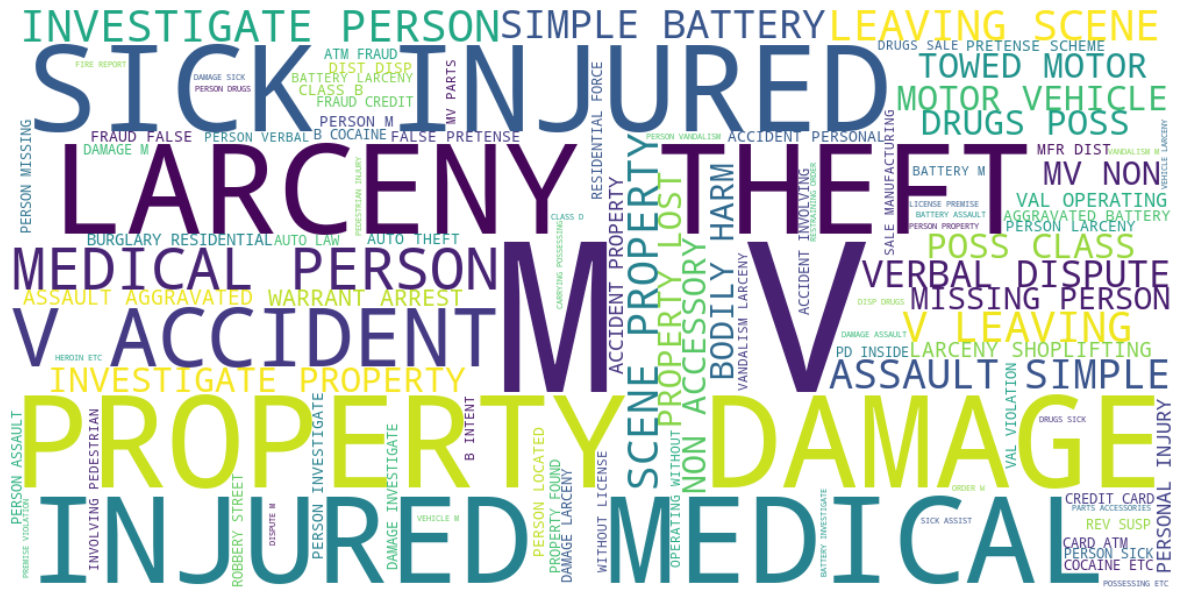

In [26]:
# текстовый анализ, соствляем карту слов

text = ' '.join(df['OFFENSE_DESCRIPTION'].astype(str).tolist())
wordcloud = WordCloud(background_color="white", width = 1000, height = 500, max_words=100).generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [27]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='transformers')

In [28]:
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline

top_categories = df['OFFENSE_CODE_GROUP'].value_counts().index[:5]

# Инициализируем суммирование
summarizer = pipeline('summarization')

# Инициализируем подсчет слов
vec = CountVectorizer(stop_words='english').fit([' '.join(df['OFFENSE_DESCRIPTION'])])
bag_of_words = vec.transform([' '.join(df['OFFENSE_DESCRIPTION'])])
sum_words = bag_of_words.sum(axis=0) 

words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

summaries = {}
for category in top_categories:
    descs = df[df['OFFENSE_CODE_GROUP'] == category]['OFFENSE_DESCRIPTION'].unique()
    summarised = [summarizer(desc, max_length=15, min_length=5, do_sample=False)[0]['summary_text'] for desc in descs]
    summaries[category] = sorted([(word, freq) for word, freq in words_freq if word in ' '.join(summarised)], key=lambda x: x[1], reverse=True)[:10]

summaries


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

C:\Users\Nasty\anaconda3\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Nasty\.cache\huggingface\hub\models--sshleifer--distilbart-cnn-12-6. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_leng

{'Motor Vehicle Accident Response': [('accident', 20087)],
 'Larceny': [('building', 10601), ('200', 20), ('50', 19), ('199', 6)],
 'Medical Assistance': [('ma', 2872),
  ('death', 2625),
  ('car', 1702),
  ('attempt', 1225),
  ('suicide', 784),
  ('control', 376)],
 'Investigate Person': [('ma', 2872), ('death', 2625), ('car', 1702)],
 'Other': [('investigate', 30623),
  ('assault', 24476),
  ('harassment', 4263),
  ('law', 3224),
  ('ma', 2872),
  ('investigation', 1425),
  ('animal', 731),
  ('offense', 661),
  ('agency', 203),
  ('involved', 58)]}

Исходя из данных, вот общий контекст для каждой из категорий преступлений на основе топовых слов в суммаризации:

1. Motor Vehicle Accident Response: Основной контекст - "аварии" (слово "accident" встретилось 20,087 раз), что вполне ожидаемо для этой категории.

2. Larceny (кража): Здесь топовые слова - это "200" и "50". Эти числа могут быть связаны с частотой упоминания в контексте кражи. Число "199" также присутствует, возможно, это коды законодательства или какие-то оперативные термины, связанные с этим типом преступлений.

3. Medical Assistance (медицинская помощь): Этот контекст включает такие слова, как "ma" (Массачусетс?), "death" (смерть), "car" (автомобиль), "attempt" (попытка), "suicide" (самоубийство) и "control" (контроль). Эти ключевые слова предполагают, что в случаях, когда требуется медицинская помощь, часто упоминаются попытки самоубийства и аварии.

4. Investigate Person (расследование лица): В эту категорию входят слова "ma", "death" и "car". Возможно, расследования лиц часто связаны со смертельными случаями и авариями.

5. Other ( другое ): В этой категории наиболее частыми являются слова "investigate" (расследовать), "harassment" (домогательства), "law" (закон), "ma", "viol" (возможно, сокращение от violation - нарушение), "investigation" (расследование), "animal" (животное), "offense" (преступление), "agency" (агентство) и "involved" (участвует). Это показывает относительно большое разнообразие кейсов в этой категории.
